### Kernel (Parzen) Density Estimation

Perform Kernel (Parzen) Density estimation on the Mystery.csv dataset in the folder, using your own gaussian kernel implemented from scratch.

The function `gaussian_kernel(x, xp, ls, variance=1)` takes as inputs: `x`, a scalar or an array of points where the kernel is evaluated; `xp`, a scalar or an array of data points; `ls`, the length scale (or bandwidth) of the Gaussian kernel; and `variance`, the variance of the Gaussian kernel. The function should compute and return the Gaussian kernel value as:

$$
K(x, x') = \frac{1}{\sqrt{2 \pi \text{variance}}} \exp\left(- \frac{(x - x')^2}{2 \cdot \text{variance} \cdot \text{ls}^2}\right).
$$


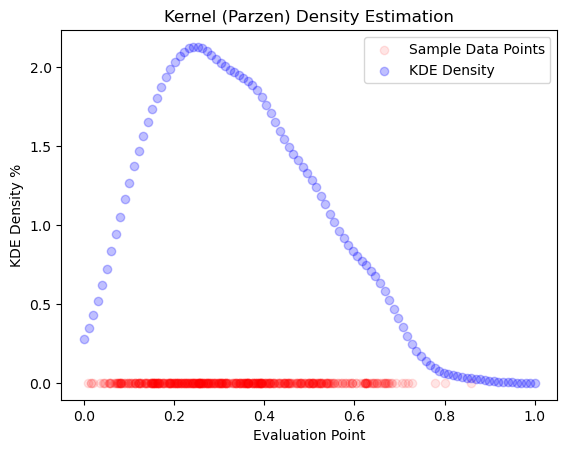

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Kernel function K_ls(x,x')
def gaussian_kernel(x, xp, ls, variance=1):
    coeff = 1 / (np.sqrt(2 * np.pi * variance))
    exp = np.exp(-1 * (x-xp)**2 / (2 * variance * ls**2))
    return coeff * exp

# Kernel Density Estimation
def KDE(eval_pts, data, ls):
    n = eval_pts.size
    size = data.size
    px = np.zeros(n)
    for i in range(n):
        for pt in data:
            px[i] += gaussian_kernel(eval_pts[i], pt, ls) / (size * ls) 
    return px

# Apply to Mystery Data Set
df = pd.read_csv('Mystery.csv').to_numpy()
data = df[:,1]
ls = 0.05
eval_pts = np.linspace(0,1,100)
px = KDE(eval_pts, data, ls)

plt.scatter(data, np.zeros_like(data), alpha=0.1, label='Sample Data Points', color='red')
plt.scatter(eval_pts, px, alpha=0.25, label='KDE Density', color='blue')
plt.title("Kernel (Parzen) Density Estimation")
plt.xlabel("Evaluation Point")
plt.ylabel("KDE Density %")
plt.legend()
plt.show()

Implement the Kullback-Leibler (KL) divergence and use it to compare the empirical distribution from above against two fitted parametric distributions: the Beta distribution and the Gaussian distribution.

The function `compute_kl_divergence(ps, qs, epsilon=1e-3)` computes the empirical KL divergence between two probability distributions evaluated at a set of points over the domain: `ps` (the reference distribution) and `qs` (the model distribution). The KL divergence is computed as

$$
D_{\text{KL}}(P \parallel Q) = \sum_x P(x) \log\left(\frac{P(x)}{Q(x)}\right).
$$

KL-Divergence with Beta Distribution: 0.0019420673909687574
KL-Divergence with Gaussian Distribution: 0.018199944580050746


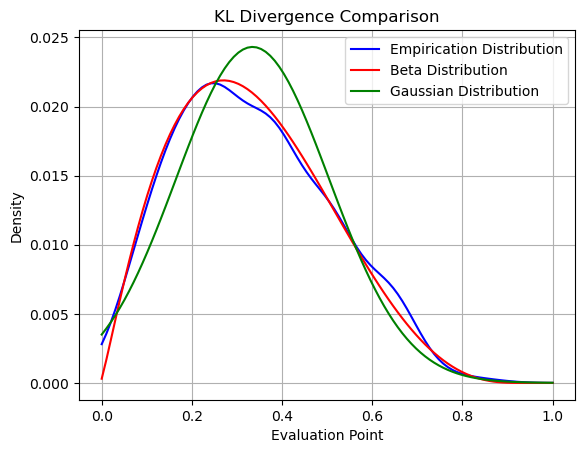

In [ ]:
from scipy.stats import beta
def compute_kl_divergence(ps, qs, epsilon=1e-3):
    ps = np.clip(ps, epsilon, None)
    qs = np.clip(qs, epsilon, None)
    return np.sum(ps * np.log(ps / qs))

# Compute beta distribution parameters
params = beta.fit(data)
a, b, loc, scale = params

# Compute gaussian distribution parameters
mean = np.mean(data)
std = np.std(data)

# Evaluate beta/gaussian pdf at evaluation points
beta_pdf = beta.pdf(eval_pts, a, b, loc, scale)
gaussian_pdf = [ 1 / (np.sqrt(2 * np.pi) * std) * np.exp(-(x-mean)**2 / (2 * std**2)) for x in eval_pts]

# Normalize distributions to have integral equal to 1
px /= np.sum(px)
beta_pdf /= np.trapz(beta_pdf)
gaussian_pdf /= np.trapz(gaussian_pdf)

# Compute KL divergence between empirical distribution and beta/gaussian distribution
beta_kl_div = compute_kl_divergence(px, beta_pdf)
gaussian_kl_div = compute_kl_divergence(px, gaussian_pdf)

print(f"KL-Divergence with Beta Distribution: {beta_kl_div}")
print(f"KL-Divergence with Gaussian Distribution: {gaussian_kl_div}")

# Plotting the KDEs
plt.plot(eval_pts, px, label='Empirication Distribution', color='blue')
plt.plot(eval_pts, beta_pdf, label='Beta Distribution', color='red')
plt.plot(eval_pts, gaussian_pdf, label='Gaussian Distribution', color='green')
plt.title('KL Divergence Comparison')
plt.xlabel('Evaluation Point')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()
    
